<a href="https://colab.research.google.com/github/vkthakur90/AI_Applications/blob/master/CandleStick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade mplfinance

In [2]:
import yfinance as yf
import mplfinance as mpf

In [3]:
NAME = "NIFTY"
ticker = yf.Ticker('^NSEI')

In [4]:
history_df = ticker.history(period = "1y")

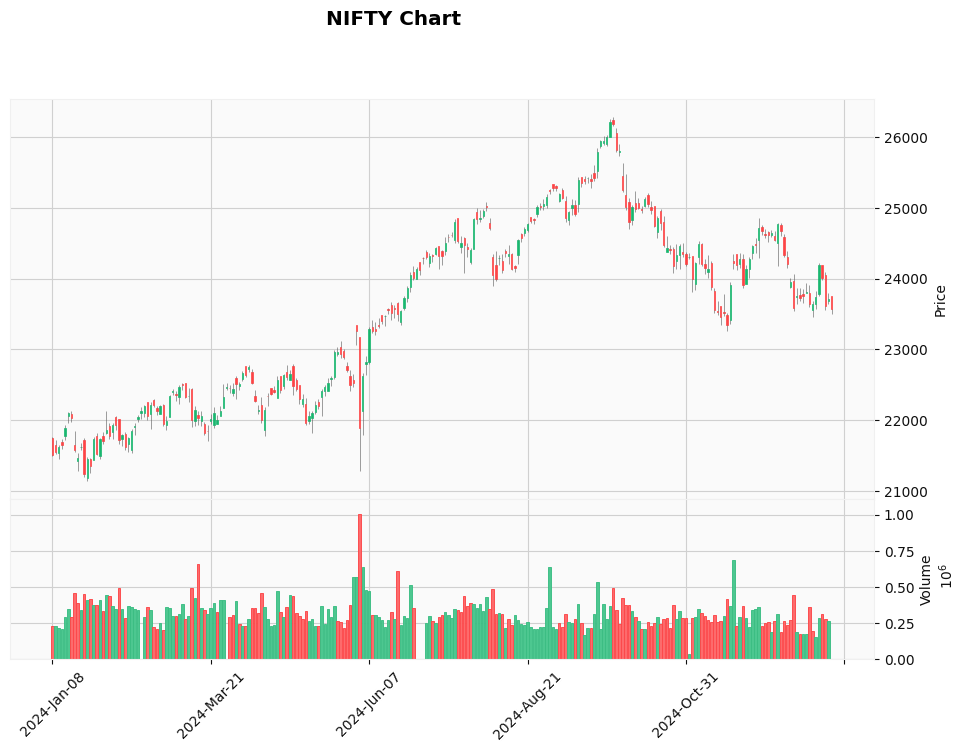

In [5]:
mpf.plot(
    history_df,
    type="candle",  # Candlestick chart
    style="yahoo",  # Chart style
    title=f"{NAME} Chart",
    volume=True,  # Include volume subplot
    ylabel="Price",
    ylabel_lower="Volume",
    figratio=(16, 9),  # Aspect ratio of the figure
    figsize=(12, 8),  # Size of the figure
)